# Raw and Location-Averaged $\delta$$^1$$^1$B Data
### Figure Content:
 - **Extended Data Figure 2:** Skeletal δ11B data from the Salish Sea and West Coast
 -----------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

# Open files

In [2]:
file_coral_d11B_info = '/home/mmstoll/raid/Data/Coral_Data/BGC_Model_Coral_d11B_Data.csv'

In [3]:
coral_d11B_data = pd.read_csv(file_coral_d11B_info, header = 0)
coral_d11B_data = coral_d11B_data.loc[:, ~coral_d11B_data.columns.str.contains('^Unnamed')]
coral_d11B_data = coral_d11B_data.dropna()

In [4]:
salish_sea_hist = coral_d11B_data.loc[(coral_d11B_data['Salish_vs_West_Coast']=='Salish Sea') &
                                      (coral_d11B_data['Historic_vs_Modern']=='Historic')]
salish_sea_mod = coral_d11B_data.loc[(coral_d11B_data['Salish_vs_West_Coast']=='Salish Sea') &
                                      (coral_d11B_data['Historic_vs_Modern']=='Modern')]
west_coast = coral_d11B_data.loc[coral_d11B_data['Salish_vs_West_Coast']=='West Coast']

# Calculate $\delta$$^1$$^1$B location averages, standard deviations, and standard errors
**Means**
 - Calculate average at every location
 - Historic Salish Sea
   - Averaged together 19272 (1 coral) and 92626 (8 corals) given close proximity to Admiralty Inlet
 - Modern Salish Sea
   - Averaged together D02 (2 corals) and D04 (8 corals) given close proximity 
   - All averages include multiple samples from single coral

**Sample Standard Deviations**
 - Standard deviation equation where $X$ = sample value; $\bar{X}$ = sample mean; and $n$ = number of samples  
$$ s = \sqrt{\frac{\sum(x_i-\bar{x})^2}{n-1}} $$

**Sample Standard Errors**
 - Standard error equation where $s$ = the sample standard deviation and $n$ = number of samples
$$ s_{\bar{x}} =  \frac{s}{\sqrt{n}}$$
 -  If only one sample, took the population standard deviation (assumed from lots with 8 corals; see below) and calculated average (~0.4). The standard error for locations with only one sample is equal to the population standard deviation

**Population Standard Deviations**
 - Calculate the standard deviations of ALL locations that have 8 or more corals
 - Calculate the average standard deviation from all locations that have 8 or more corals. This will be interpreted as the population standard deviation
 - USNM 78638 has 8 corals, but is excluded from the population standard deviation calculation since these corals are located in a tide pool and their variability is an outlier
$$ \sigma = \sqrt{\frac{\sum(x_i-\mu)^2}{N}} $$

**Population Standard Errors**
 - Calculate the standard error from the population standard deviation (population standard deviation divided by square root of number of samples)
$$ \sigma_{\bar{x}} =  \frac{\sigma}{\sqrt{N}}$$

**Standard Error - Error Bars**
 - For each location, the error bars represent a standard error calculated from the sample standard deviation

In [5]:
def site_averaged_data(df):
    if df['Salish_vs_West_Coast'].iloc[0] == 'West Coast':
        ID = 'Location_ID'
    else:
        ID = 'Location'
    avg_df = df.groupby(by = df[ID], sort = False).mean()
    avg_df['#_Corals'] = df.groupby(ID).size()
    avg_df['Samp_d11B_Std_Dev'] = df.groupby(by=df[ID]).std()
    avg_df['Samp_d11B_Std_Err'] = avg_df['Samp_d11B_Std_Dev'] / np.sqrt(avg_df['#_Corals'])

    return(avg_df)

Calculate site means, sample standard deviations, and sample standard errors

In [6]:
data_list = [west_coast, salish_sea_mod, salish_sea_hist]
data_list_name = ['west_coast','salish_sea_mod','salish_sea_hist'] 

for data_region, data_region_name in zip(data_list, data_list_name):
    globals()["avg_" + data_region_name] = site_averaged_data(data_region)

Calculate population standard deviation and standard errors

In [21]:
avg_data_merge = pd.concat([avg_west_coast, avg_salish_sea_mod, avg_salish_sea_hist], axis=0)
avg_data_merge = avg_data_merge.loc[(avg_data_merge['#_Corals']>=8) & (avg_data_merge.index != 'USNM 78638')]
pop_std_dev = avg_data_merge['Samp_d11B_Std_Dev'].mean()
print('The population standard deviation is ' + str(round(pop_std_dev,3)))

The population standard deviation is 0.37


In [8]:
def pop_std_err(avg_df, pop_std_dev):
    avg_df['Pop_d11B_Std_Err'] = pop_std_dev / np.sqrt(avg_df['#_Corals'])
    avg_df['d11B_Std_Err'] = np.nan

    for i in range(0,len(avg_df)):
        if avg_df['#_Corals'].iloc[i] == 1:
            avg_df['d11B_Std_Err'].iloc[i] = avg_df['Pop_d11B_Std_Err'].iloc[i]
        else:
            avg_df['d11B_Std_Err'].iloc[i] = avg_df['Samp_d11B_Std_Err'].iloc[i]
    return(avg_df)

In [14]:
avg_data_list = [avg_west_coast, avg_salish_sea_mod, avg_salish_sea_hist]
for avg_data_region_name in avg_data_list:
    avg_data_region_name = pop_std_err(avg_data_region_name, pop_std_dev)

# Figures

### Extended Data Figure 2

Skeletal δ11B data from the Salish Sea (top row) and the US West Coast (bottom row). Left column: Raw skeletal δ11B at individual locations. Each point represents a sample from a single coral. Historic measurements are shown in green and modern measurements shown in gray. Historic Salish Sea n = 13; modern Salish Sea n = 52; historic West Coast n = 41. Right column: Location-averaged δ11B data. Error bars represent the standard error of the mean at each location. If only one coral was sampled, the population standard deviation was used. The population standard deviation was calculated by averaging the sample standard deviation at every location where 8 or more corals were collected. USNM 78638 was excluded from this calculation due to the high variability associated with tide pools.

In [11]:
fig_dict = {
    'title_size':20,
    'axis_size':18,
    'cap_size':6,
    'tick_size':14,
}

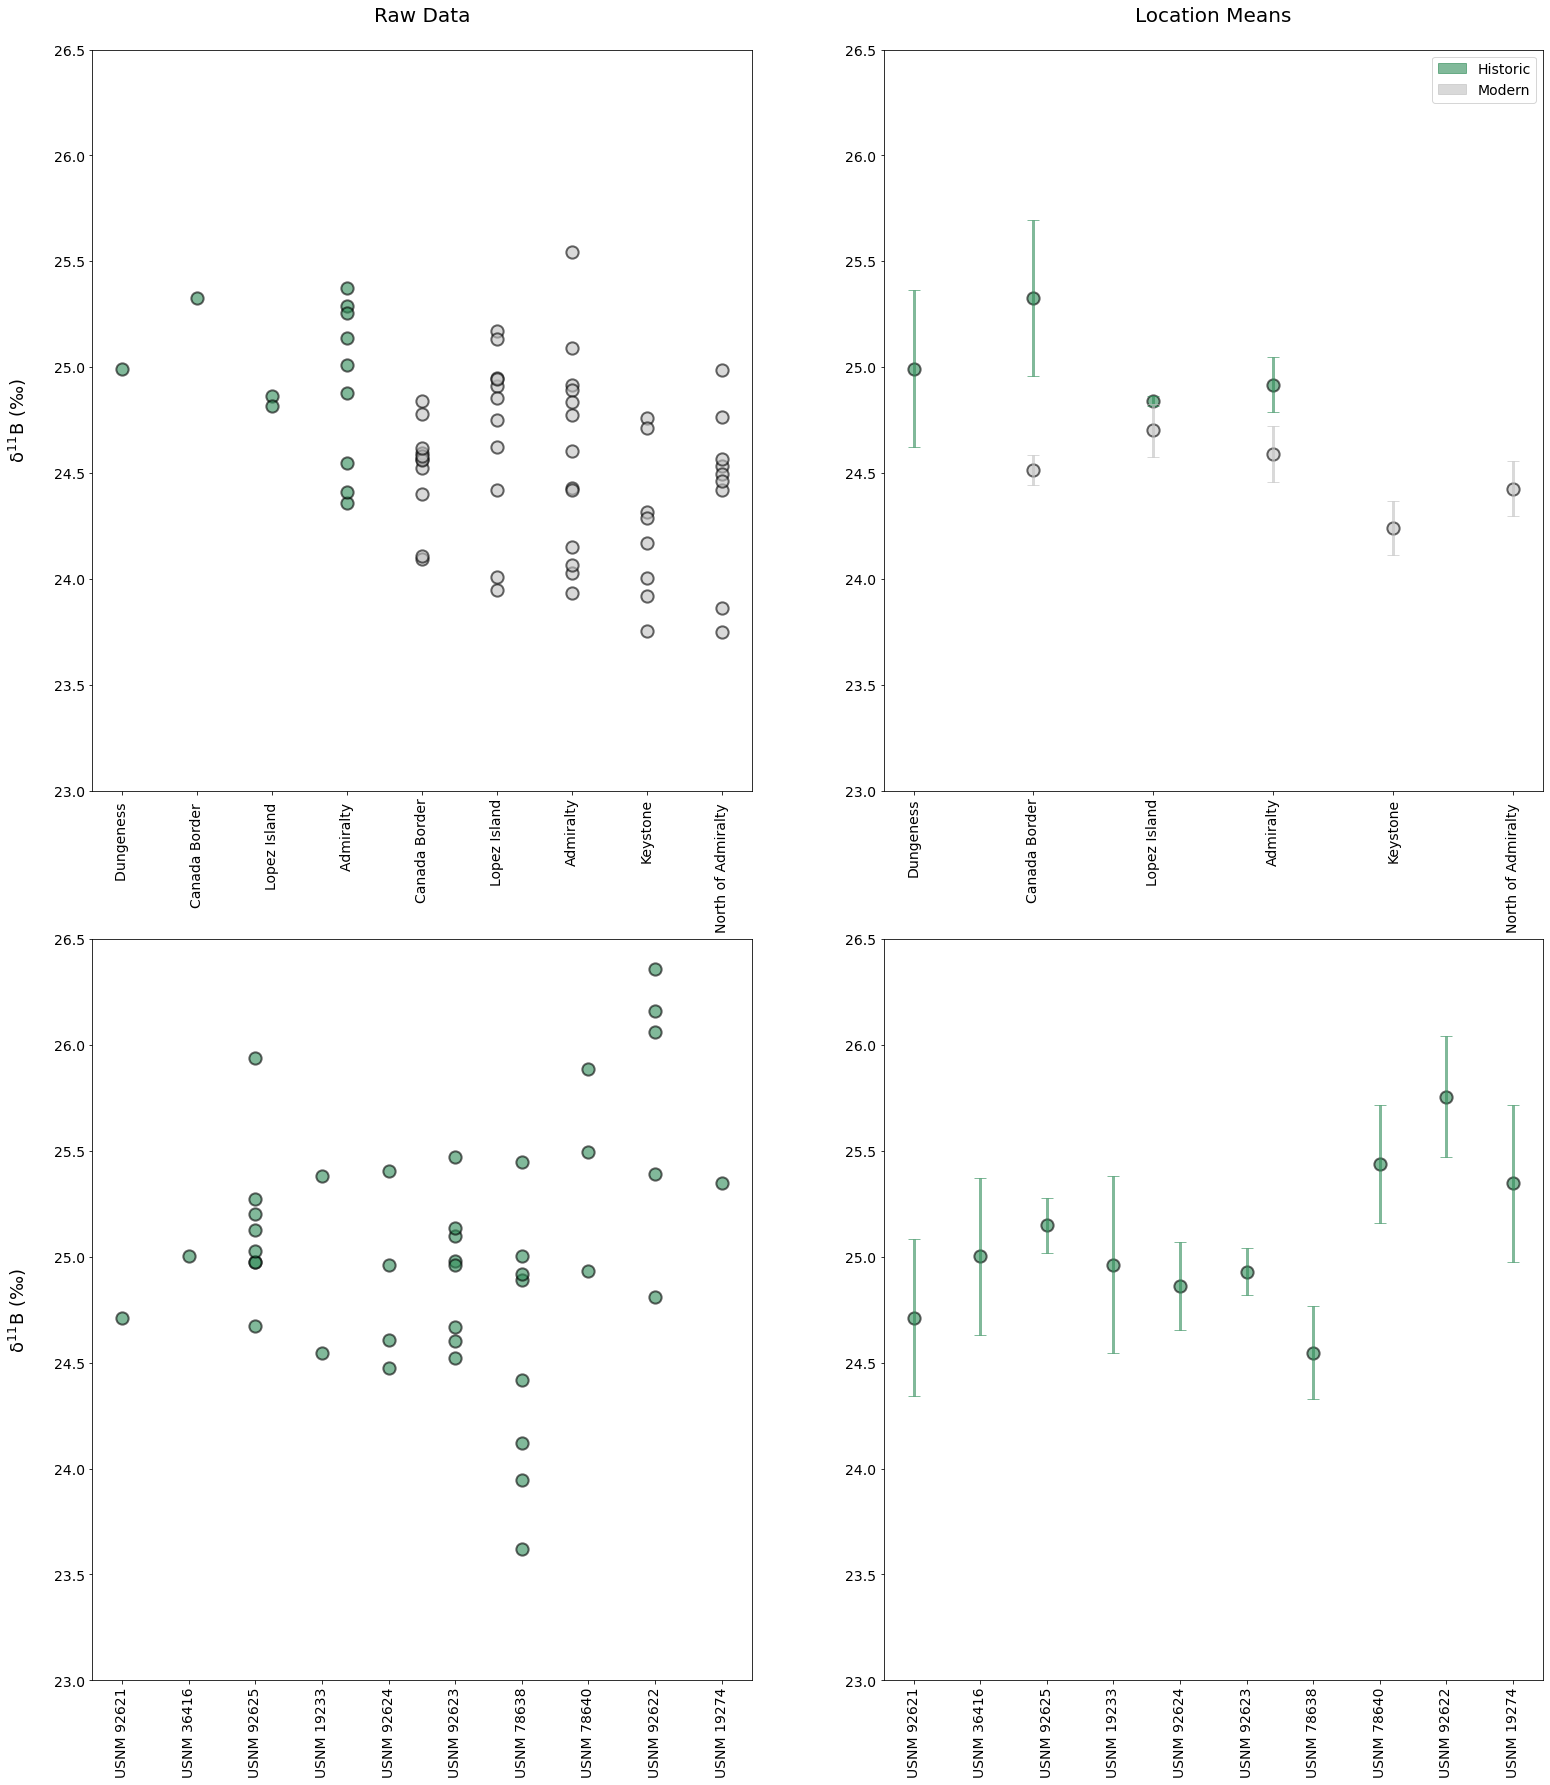

In [20]:
fig = plt.figure(figsize = (26,30))
ax = fig.add_subplot(221)

for i in range(0,4):
    if i == 0:
        ax.scatter(salish_sea_hist['Location']+ ' ', salish_sea_hist['d11B'], color = 'seagreen', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        ax.scatter(salish_sea_mod['Location']+ '', salish_sea_mod['d11B'], color = 'silver', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        ax.set_title('Raw Data\n', size = fig_dict['title_size'])
        ax.set_ylabel('δ$^1$$^1$B (‰)\n', size = fig_dict['axis_size'])
        
    if i == 1:
        ax = fig.add_subplot(222)
        ax.scatter(avg_salish_sea_hist.index, avg_salish_sea_hist['d11B'], color = 'seagreen', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        ax.scatter(avg_salish_sea_mod.index, avg_salish_sea_mod['d11B'], color = 'silver', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        plt.errorbar(avg_salish_sea_hist.index, avg_salish_sea_hist['d11B'], color = 'seagreen', ls = 'none', linewidth = 3,  
                     yerr = avg_salish_sea_hist['d11B_Std_Err'], capsize = fig_dict['cap_size'], alpha = 0.6)
        plt.errorbar(avg_salish_sea_mod.index, avg_salish_sea_mod['d11B'], color = 'silver', ls = 'none', linewidth = 3, 
                     yerr = avg_salish_sea_mod['d11B_Std_Err'], capsize = fig_dict['cap_size'], alpha = 0.6)
        ax.set_title('Location Means\n', size = fig_dict['title_size'])
        historic_patch = mpatches.Patch(color='seagreen', label='Historic', alpha = 0.6)
        modern_patch = mpatches.Patch(color='silver', label='Modern', alpha = 0.6)
        ax.legend(handles=[historic_patch, modern_patch], prop={"size":fig_dict['tick_size']})

    if i == 2:
        ax = fig.add_subplot(223)
        ax.scatter(west_coast['Location_ID'], west_coast['d11B'], color = 'seagreen', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        ax.set_ylabel('δ$^1$$^1$B (‰)\n', size = fig_dict['axis_size'])
        
    if i == 3:
        ax = fig.add_subplot(224)
        ax.scatter(avg_west_coast.index, avg_west_coast['d11B'], color = 'seagreen', s=150, linewidth = 2, edgecolor='k', alpha = 0.6)
        plt.errorbar(avg_west_coast.index, avg_west_coast['d11B'], color = 'seagreen', ls = 'none', linewidth = 3, 
                     yerr = avg_west_coast['d11B_Std_Err'], capsize = fig_dict['cap_size'], alpha = 0.6)
        
    ax.set_ylim(23,26.5)
    plt.xticks(rotation=90, size = fig_dict['tick_size'], )
    plt.yticks(size = fig_dict['tick_size'])